Allan Reuben

260783324
# Assignment 4
---





In [1]:
# Imports

import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import segmentation, color
from skimage.future import graph
from skimage.segmentation import quickshift
from google.colab import drive
drive.mount('/content/drive')

# Change path if necessary
path = '/content/drive/My Drive/ECSE415/Assignment-4/'

# Load the image in colour + grayscale
flower = cv2.imread(path+'flower.jpg', cv2.IMREAD_COLOR)
flower = cv2.cvtColor(flower, cv2.COLOR_BGR2RGB)
gray_flower = cv2.cvtColor(flower, cv2.COLOR_RGB2GRAY)

# Set random seed for testing
#np.random.seed(seed=255)

Mounted at /content/drive


# Part 1.1.1: K-means clustering

1) Implement K-means clustering from scratch.

In [2]:
# Algorithm adapted from class notes in segmentation part 1
def k_means_clustering(image, k):
  # Define cluster centers
  # Each cluster center is n_features-dimensional within a range of 0-255
  h = image.shape[0]
  w = image.shape[1]
  if len(image.shape) > 2:
    channels = image.shape[2]
    cluster_centers = np.random.randint(0, 255, (k, channels))
  else:
    cluster_centers = np.random.randint(0, 255, (k))
  output_images = []
  counter = 0
  while True:
    # Create array to store locations of pixels in each cluster
    # Clusters is a list of lists of pixel locations
    clusters = np.empty((k, 0)).tolist()
    # Determine pixels in each cluster
    for i in range(image.shape[0]):
      for j in range(image.shape[1]):
        # Extract pixel
        pixel = image[i][j]
        # Calculate which cluster is closest and add pixel to cluster
        assign_to_cluster(pixel, clusters, cluster_centers, i ,j)
          
    # For the first 5 iterations display the image
    if counter <= 5:
      counter += 1
      # Rebuild segmented image
      segmented_image = np.zeros_like(image)
      for i, cluster in enumerate(clusters):
        for pixel_location in cluster:
          h, w = pixel_location
          segmented_image[h][w] = cluster_centers[i]
      output_images.append(segmented_image)

    # Update the mean of every cluster
    new_cluster_centers = cluster_mean(image, clusters, cluster_centers)
    # If our cluster centers have not changed, then we are finished
    if np.all(cluster_centers == new_cluster_centers):
      break
    # If they have changed, update our new cluster values
    cluster_centers = new_cluster_centers

    
    
  # Rebuild segmented image
  segmented_image = np.zeros_like(image)
  for i, cluster in enumerate(clusters):
    for pixel_location in cluster:
      h, w = pixel_location
      segmented_image[h][w] = cluster_centers[i]
  output_images.append(segmented_image)
  return output_images


def assign_to_cluster(pixel, clusters, cluster_centers, height, width):
  # Best match is very high number to start
  best = 99999999
  best_index = 0
  # Find the closest cluster to the pixel
  for i, center in enumerate(cluster_centers):
    # Calculate sum of square distance from pixel to cluster center
    ssd = np.linalg.norm(pixel - center)
    if ssd < best:
      best = ssd
      best_index = i
  # Store pixel location in cluster
  clusters[best_index].append([height, width])

def cluster_mean(image, clusters, cluster_centers):
  new_cluster_centers = np.zeros_like(cluster_centers)
  for index, cluster in enumerate(clusters):
    pixels = []
    # Recover all pixel intensities within each cluster
    for pixel_location in cluster:
      h, w = pixel_location
      pixels.append(image[h][w])
    
    # For each cluster, calculate the new cluster center
    pixels = np.asarray(pixels)
    mean = np.mean(pixels, axis = 0)
    new_cluster_centers[index] = mean

  return new_cluster_centers

2) Apply your implementation of K-means to the provided image with K=2 and K=3. Use R, G, B color channels of the image as three features. Display (a) the segmentation evolving during the first 5 iterations and (b) the final segmentation.

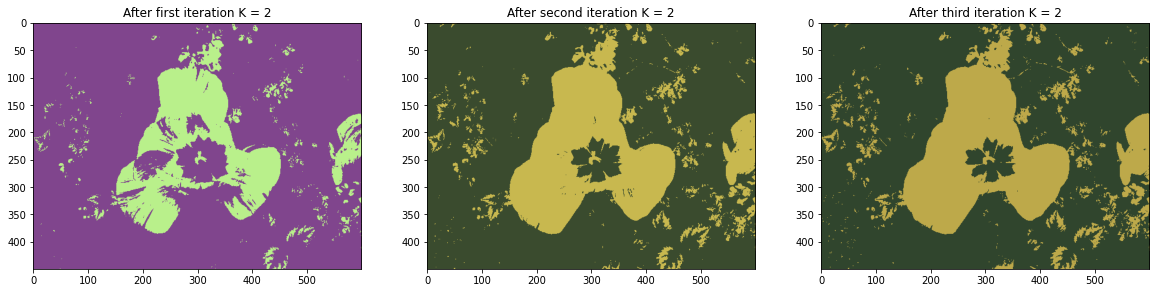

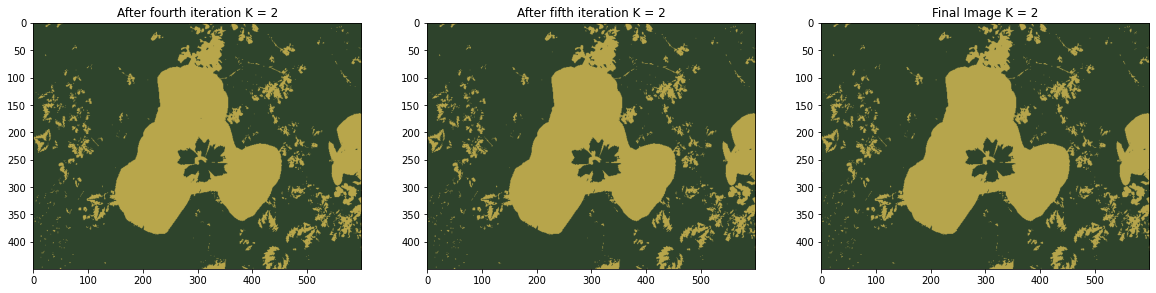

In [3]:
result_images_2_rgb = k_means_clustering(flower, 2)
titles = ["After first iteration K = 2", "After second iteration K = 2",
          "After third iteration K = 2", "After fourth iteration K = 2", 
          "After fifth iteration K = 2", "Final Image K = 2"]

plt.figure(figsize = (20,20))
plt.subplot(131), plt.imshow(result_images_2_rgb[0])
plt.title(titles[0])
plt.subplot(132), plt.imshow(result_images_2_rgb[1])
plt.title(titles[1])
plt.subplot(133), plt.imshow(result_images_2_rgb[2])
plt.title(titles[2])
plt.show()

plt.figure(figsize = (20,20))
plt.subplot(131), plt.imshow(result_images_2_rgb[3])
plt.title(titles[3])
plt.subplot(132), plt.imshow(result_images_2_rgb[4])
plt.title(titles[4])
plt.subplot(133), plt.imshow(result_images_2_rgb[5])
plt.title(titles[5])
plt.show()

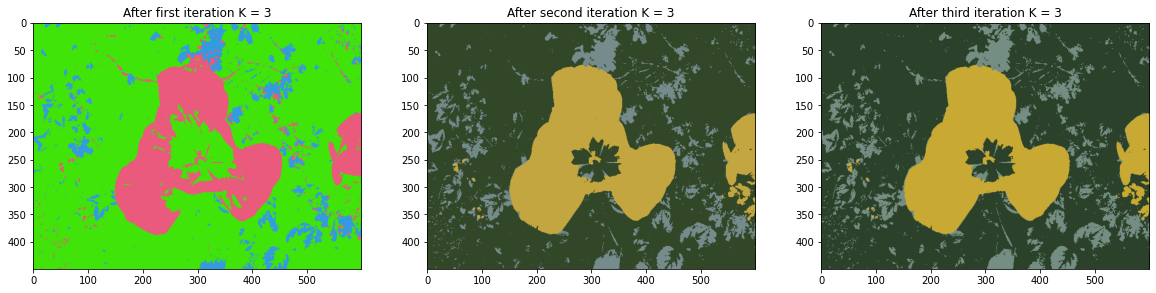

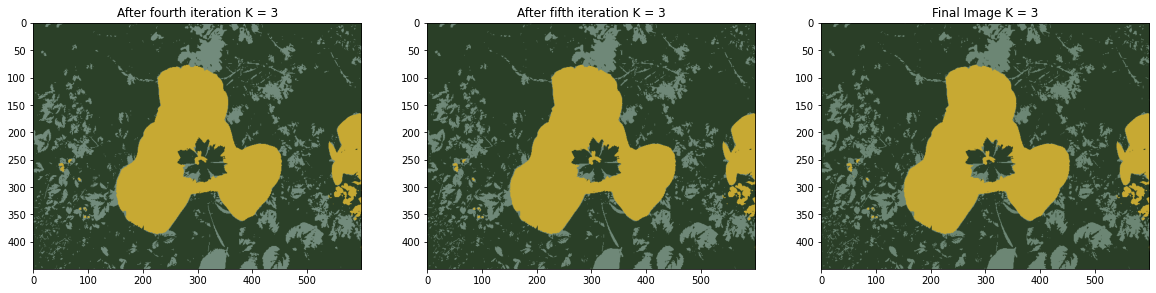

In [4]:
result_images_3_rgb = k_means_clustering(flower, 3)
titles = ["After first iteration K = 3", "After second iteration K = 3",
          "After third iteration K = 3", "After fourth iteration K = 3", 
          "After fifth iteration K = 3", "Final Image K = 3"]

plt.figure(figsize = (20,20))
plt.subplot(131), plt.imshow(result_images_3_rgb[0])
plt.title(titles[0])
plt.subplot(132), plt.imshow(result_images_3_rgb[1])
plt.title(titles[1])
plt.subplot(133), plt.imshow(result_images_3_rgb[2])
plt.title(titles[2])
plt.show()

plt.figure(figsize = (20,20))
plt.subplot(131), plt.imshow(result_images_3_rgb[3])
plt.title(titles[3])
plt.subplot(132), plt.imshow(result_images_3_rgb[4])
plt.title(titles[4])
plt.subplot(133), plt.imshow(result_images_3_rgb[5])
plt.title(titles[5])
plt.show()

3) Convert the given image into gray-scale. Apply K-means to the provided image with K=2 and K=3. For every pixel, use gray-scale intensity as feature. Display (a) the segmentation evolving during the first 5 iterations and (b) the final segmentation.

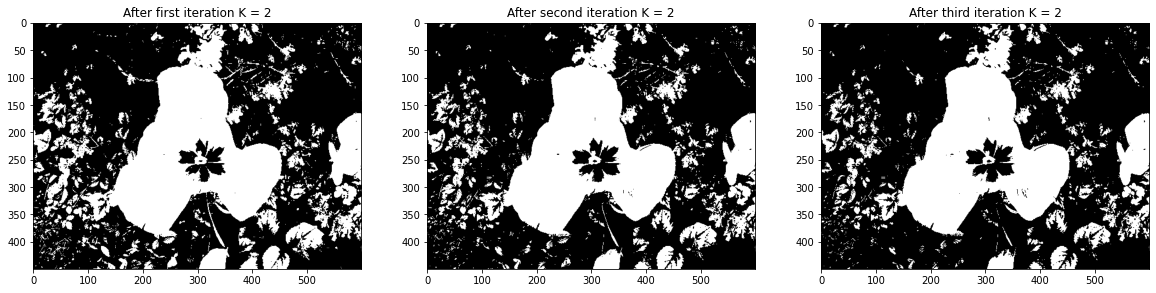

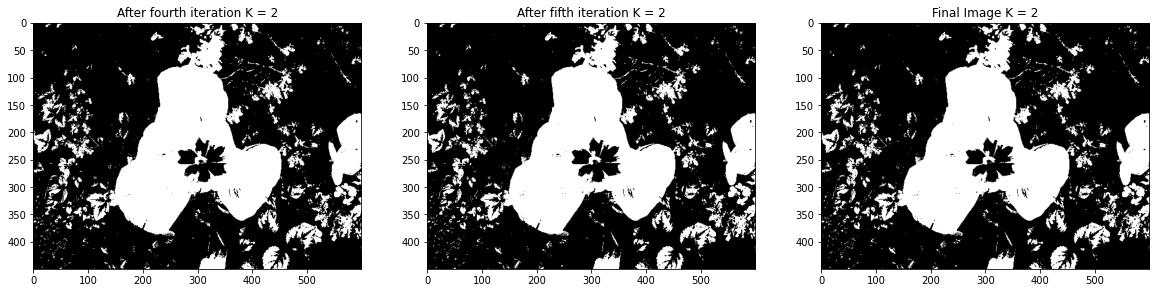

In [5]:
result_images_2_gray = k_means_clustering(gray_flower, 2)
titles = ["After first iteration K = 2", "After second iteration K = 2",
          "After third iteration K = 2", "After fourth iteration K = 2", 
          "After fifth iteration K = 2", "Final Image K = 2"]

plt.figure(figsize = (20,20))
plt.subplot(131), plt.imshow(result_images_2_gray[0], cmap='gray')
plt.title(titles[0])
plt.subplot(132), plt.imshow(result_images_2_gray[1], cmap='gray')
plt.title(titles[1])
plt.subplot(133), plt.imshow(result_images_2_gray[2], cmap='gray')
plt.title(titles[2])
plt.show()

plt.figure(figsize = (20,20))
plt.subplot(131), plt.imshow(result_images_2_gray[3], cmap='gray')
plt.title(titles[3])
plt.subplot(132), plt.imshow(result_images_2_gray[4], cmap='gray')
plt.title(titles[4])
plt.subplot(133), plt.imshow(result_images_2_gray[5], cmap='gray')
plt.title(titles[5])
plt.show()

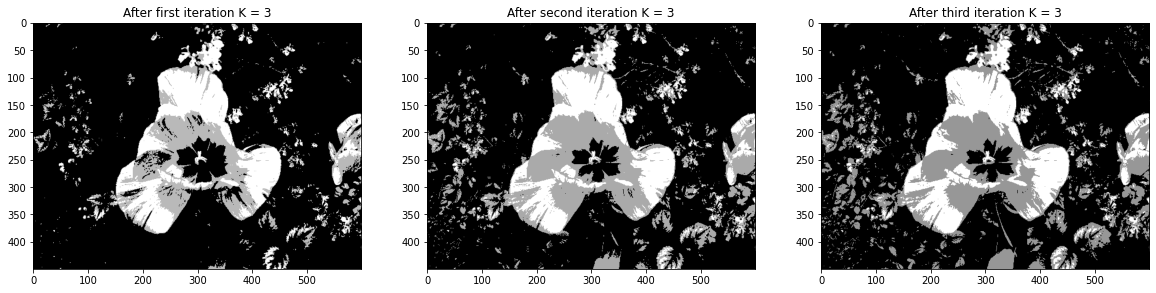

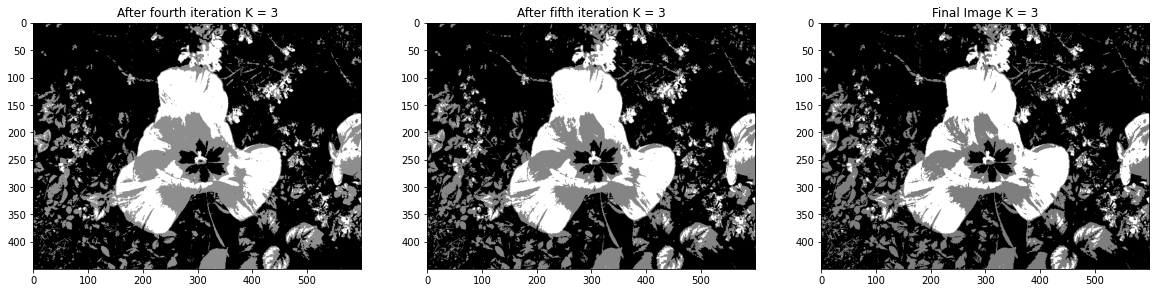

In [6]:
result_images_3_gray = k_means_clustering(gray_flower, 3)
titles = ["After first iteration K = 3", "After second iteration K = 3",
          "After third iteration K = 3", "After fourth iteration K = 3", 
          "After fifth iteration K = 3", "Final Image K = 3"]

plt.figure(figsize = (20,20))
plt.subplot(131), plt.imshow(result_images_3_gray[0], cmap='gray')
plt.title(titles[0])
plt.subplot(132), plt.imshow(result_images_3_gray[1], cmap='gray')
plt.title(titles[1])
plt.subplot(133), plt.imshow(result_images_3_gray[2], cmap='gray')
plt.title(titles[2])
plt.show()

plt.figure(figsize = (20,20))
plt.subplot(131), plt.imshow(result_images_3_gray[3], cmap='gray')
plt.title(titles[3])
plt.subplot(132), plt.imshow(result_images_3_gray[4], cmap='gray')
plt.title(titles[4])
plt.subplot(133), plt.imshow(result_images_3_gray[5], cmap='gray')
plt.title(titles[5])
plt.show()

4) Compare final segmentation maps of color and gray-scale images. Which feature results in better segmentation?

Using color features with 3 segments resulted in the best segmentation of the flower image. Both the color and grayscale K = 2 performed similarly, with the color segmentation being less sensitive to color changes on the flower. With 3 segments, both the color and grayscale results were able to separate the flower from other plants from the background, and the grayscale one was suprisingly good at this despite including some parts of the flower with the other plants.

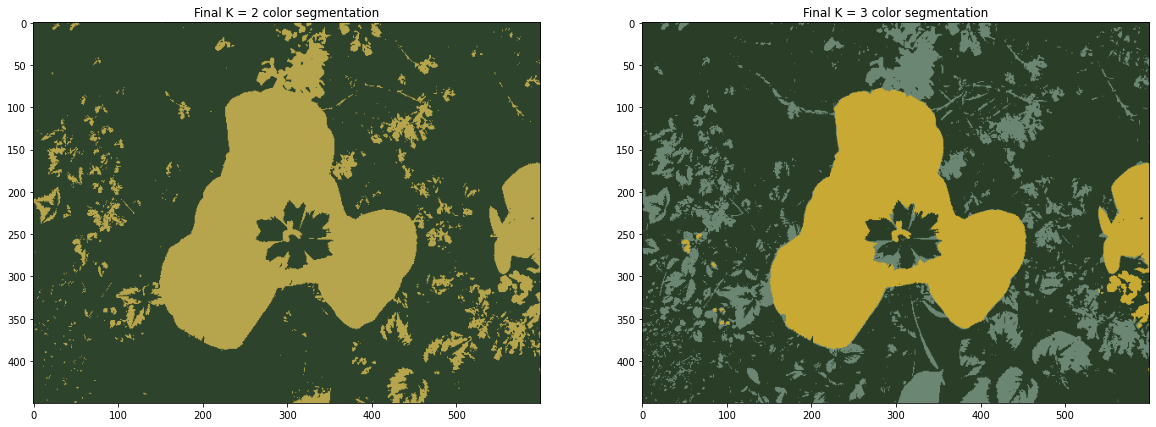

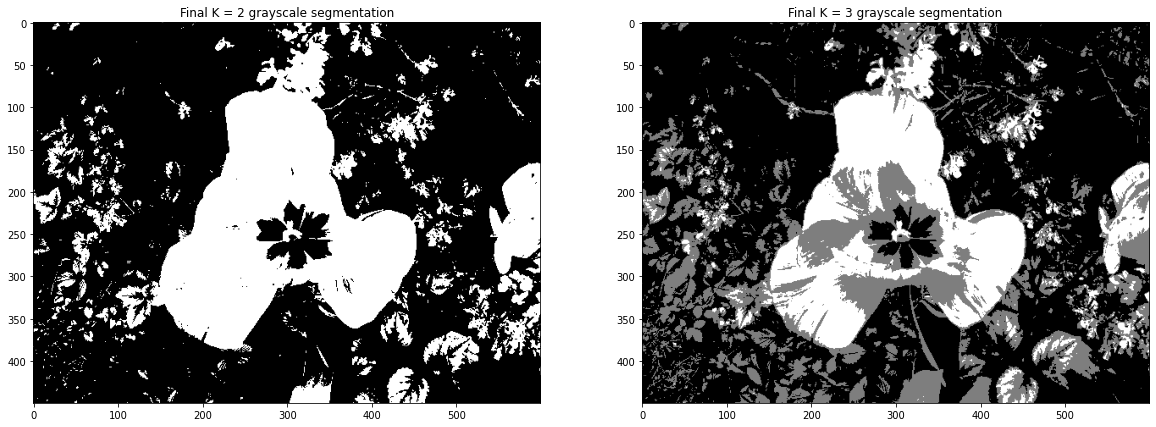

In [7]:
plt.figure(figsize = (20,20))
plt.subplot(121), plt.imshow(result_images_2_rgb[5])
plt.title("Final K = 2 color segmentation")
plt.subplot(122), plt.imshow(result_images_3_rgb[5])
plt.title("Final K = 3 color segmentation")
plt.show()

plt.figure(figsize = (20,20))
plt.subplot(121), plt.imshow(result_images_2_gray[5], cmap='gray')
plt.title("Final K = 2 grayscale segmentation")
plt.subplot(122), plt.imshow(result_images_3_gray[5], cmap='gray')
plt.title("Final K = 3 grayscale segmentation")
plt.show()

# Part 1.2: Normalized Graph-cut and Mean-shift Segmentation



1) Segment the given image using normalized graph-cuts. Vary the following parameters (try several values of each parameter): compactness and n segments (slic function), thresh (cut normalized function). Display segmentation results for several parameters and state their effect on the output.

In [8]:
# Code for normalized graph-cut taken and adapted from Tutorial 9
def normalized_graph_cut(input_image, compactness_input, n_segments_input, thresh_input):
  labels1 = segmentation.slic(input_image, compactness=compactness_input, n_segments=n_segments_input)
  # Out1 is the super-pixel image
  out1 = color.label2rgb(labels1, input_image, kind='avg')
  # Build graph
  g = graph.rag_mean_color(input_image, labels1, mode='similarity')
  # Apply graph-cut
  labels2 = graph.cut_normalized(labels1, g, thresh=thresh_input)
  out2 = color.label2rgb(labels2, input_image, kind='avg')
  return out2

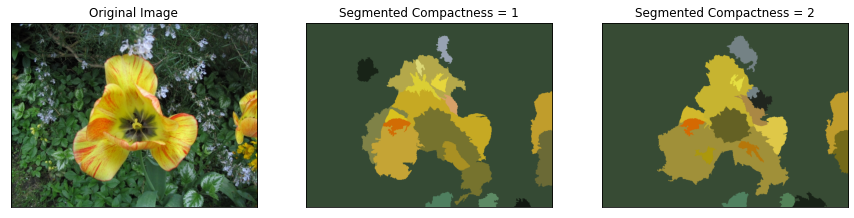

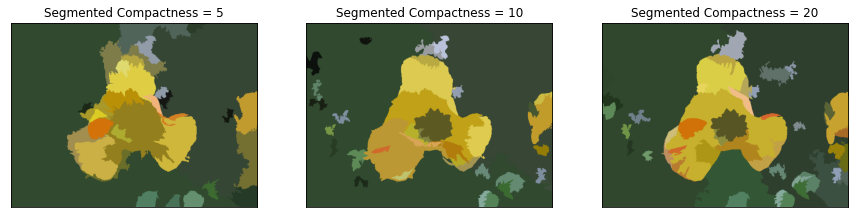

In [9]:
# Varying compactness, trying values 1, 2, 5, 10, 20
out2_1 = normalized_graph_cut(flower, 1, 400, 0.001)
out2_2 = normalized_graph_cut(flower, 2, 400, 0.001)
out2_5 = normalized_graph_cut(flower, 5, 400, 0.001)
out2_10 = normalized_graph_cut(flower, 10, 400, 0.001)
out2_20 = normalized_graph_cut(flower, 20, 400, 0.001)

plt.figure(figsize=(15,5))
plt.subplot(131), plt.imshow(flower)
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(out2_1)
plt.title("Segmented Compactness = 1"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(out2_2)
plt.title("Segmented Compactness = 2"), plt.xticks([]), plt.yticks([])
plt.show()
plt.figure(figsize=(15,5))
plt.subplot(131), plt.imshow(out2_5)
plt.title("Segmented Compactness = 5"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(out2_10)
plt.title("Segmented Compactness = 10"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(out2_20)
plt.title("Segmented Compactness = 20"), plt.xticks([]), plt.yticks([])
plt.show()

Above we see the effects of varying compactness (in the slic function) on the final output of a normalized graph-cut segmentation. The compactness parameter controls the trade off between color similarity and proximity when creating super-pixels. In the final output, greater compactness will favour proximity more, leading to smaller segments.

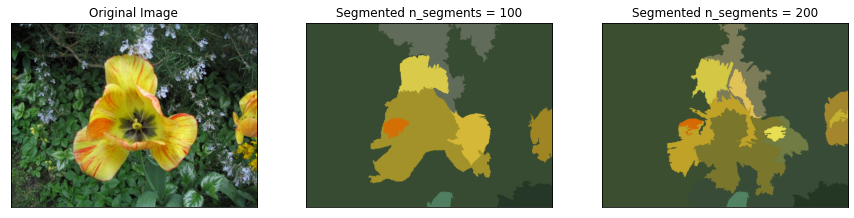

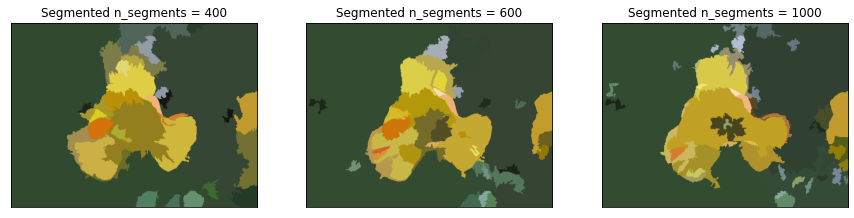

In [10]:
# Varying n_segments, trying values 100, 200, 400, 600, 1000
segments_100 = normalized_graph_cut(flower, 5, 100, 0.001)
segments_200 = normalized_graph_cut(flower, 5, 200, 0.001)
segments_400 = normalized_graph_cut(flower, 5, 400, 0.001)
segments_600 = normalized_graph_cut(flower, 5, 600, 0.001)
segments_1000 = normalized_graph_cut(flower, 5, 1000, 0.001)

plt.figure(figsize=(15,5))
plt.subplot(131), plt.imshow(flower)
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(segments_100)
plt.title("Segmented n_segments = 100"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(segments_200)
plt.title("Segmented n_segments = 200"), plt.xticks([]), plt.yticks([])
plt.show()
plt.figure(figsize=(15,5))
plt.subplot(131), plt.imshow(segments_400)
plt.title("Segmented n_segments = 400"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(segments_600)
plt.title("Segmented n_segments = 600"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(segments_1000)
plt.title("Segmented n_segments = 1000"), plt.xticks([]), plt.yticks([])
plt.show()

Above we see the effects of varying n_segments (in the slic function) on the final output of a normalized graph-cut segmentation. With more segments, there will be more super pixels, which in turn can result in more discrete segments in the final image.

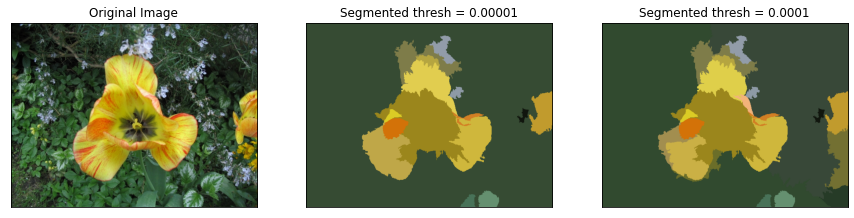

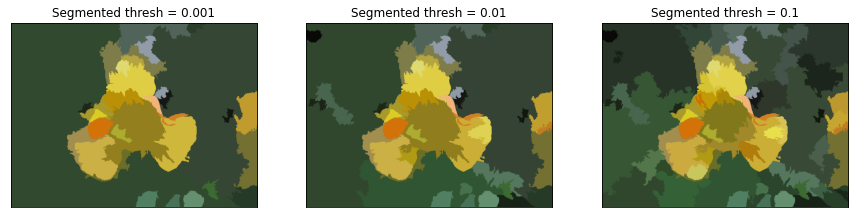

In [11]:
# Varying thresh, trying values 0.00001, 0.0001, 0.001, 0.01, 0.1
thresh_1 = normalized_graph_cut(flower, 5, 400, 0.00001)
thresh_2 = normalized_graph_cut(flower, 5, 400, 0.0001)
thresh_3 = normalized_graph_cut(flower, 5, 400, 0.001)
thresh_4 = normalized_graph_cut(flower, 5, 400, 0.01)
thresh_5 = normalized_graph_cut(flower, 5, 400, 0.1)

plt.figure(figsize=(15,5))
plt.subplot(131), plt.imshow(flower)
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(thresh_1)
plt.title("Segmented thresh = 0.00001"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(thresh_2)
plt.title("Segmented thresh = 0.0001"), plt.xticks([]), plt.yticks([])
plt.show()
plt.figure(figsize=(15,5))
plt.subplot(131), plt.imshow(thresh_3)
plt.title("Segmented thresh = 0.001"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(thresh_4)
plt.title("Segmented thresh = 0.01"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(thresh_5)
plt.title("Segmented thresh = 0.1"), plt.xticks([]), plt.yticks([])
plt.show()

Above we see the effects of varying thresh (in the cut normalized function) on the final output of a normalized graph-cut segmentation. From the documentation, we know "A subgraph won’t be further subdivided if the value of the N-cut exceeds thresh". With a higher thresh, the subgraph will be subdivided many more times, leading to many more segments in the final image.

---

2) Segment the given image using mean-shift. Vary the following parameters (try several values of each parameter): ratio, kernel size, max dist. Display segmentation results for several parameters and state their effect on the output.

In [12]:
# Code for mean shift adapted from Tutorial 9
def mean_shift(input_image, ratio_input, kernel_size_input, max_dist_input):
  label = quickshift(input_image, ratio=ratio_input, kernel_size=kernel_size_input, max_dist=max_dist_input)
  out = color.label2rgb(label, input_image, kind='avg')
  return out

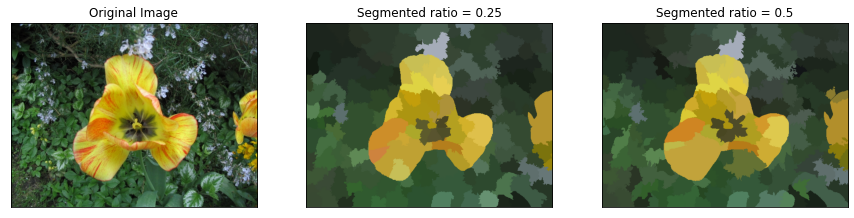

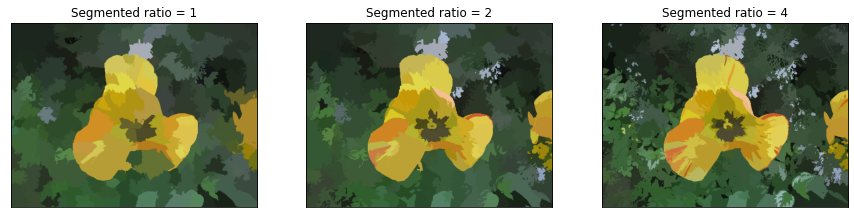

In [13]:
# Varying ratio parameter
ratio_1 = mean_shift(flower, 0.25, 5, 100)
ratio_2 = mean_shift(flower, 0.5, 5, 100)
ratio_3 = mean_shift(flower, 1, 5, 100)
ratio_4 = mean_shift(flower, 2, 5, 100)
ratio_5 = mean_shift(flower, 4, 5, 100)

plt.figure(figsize=(15,5))
plt.subplot(131), plt.imshow(flower)
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(ratio_1)
plt.title("Segmented ratio = 0.25"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(ratio_2)
plt.title("Segmented ratio = 0.5"), plt.xticks([]), plt.yticks([])
plt.show()
plt.figure(figsize=(15,5))
plt.subplot(131), plt.imshow(ratio_3)
plt.title("Segmented ratio = 1"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(ratio_4)
plt.title("Segmented ratio = 2"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(ratio_5)
plt.title("Segmented ratio = 4"), plt.xticks([]), plt.yticks([])
plt.show()

Above we can see the effects of varying ratio in a mean-shift segmentation. The ratio parameter controls the ratio of color-space proximity to image-space proximity. Lower ratios lead to larger segments by favouring color space proximity while higher ratios have many smaller and more precise segments. 

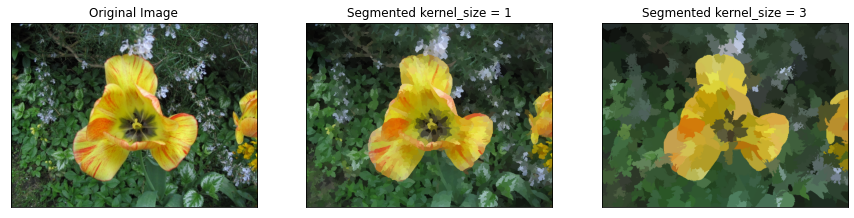

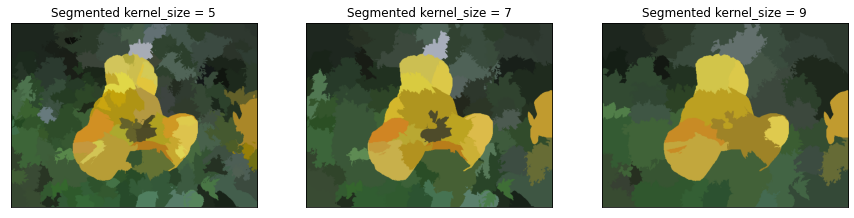

In [14]:
# Varying kernel_size parameter
kernel_1 = mean_shift(flower, 1, 1, 100)
kernel_3 = mean_shift(flower, 1, 3, 100)
kernel_5 = mean_shift(flower, 1, 5, 100)
kernel_7 = mean_shift(flower, 1, 7, 100)
kernel_9 = mean_shift(flower, 1, 9, 100)

plt.figure(figsize=(15,5))
plt.subplot(131), plt.imshow(flower)
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(kernel_1)
plt.title("Segmented kernel_size = 1"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(kernel_3)
plt.title("Segmented kernel_size = 3"), plt.xticks([]), plt.yticks([])
plt.show()
plt.figure(figsize=(15,5))
plt.subplot(131), plt.imshow(kernel_5)
plt.title("Segmented kernel_size = 5"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(kernel_7)
plt.title("Segmented kernel_size = 7"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(kernel_9)
plt.title("Segmented kernel_size = 9"), plt.xticks([]), plt.yticks([])
plt.show()

Above we can see the effects of varying the kernel size parameter in a mean shift segmentation. The kernel is used to smooth the image. With a kernel of 1, we do no smoothing and end up with our original image. With greater kernel sizes the image is smoothed more and more giving us fewer and larger segments.

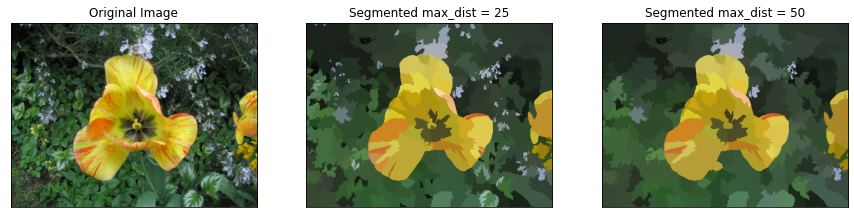

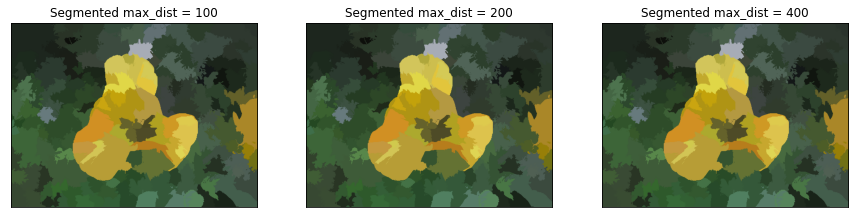

In [15]:
# Varying max dist parameter
max_dist_1 = mean_shift(flower, 1, 5, 25)
max_dist_2 = mean_shift(flower, 1, 5, 50)
max_dist_3 = mean_shift(flower, 1, 5, 100)
max_dist_4 = mean_shift(flower, 1, 5, 200)
max_dist_5 = mean_shift(flower, 1, 5, 400)

plt.figure(figsize=(15,5))
plt.subplot(131), plt.imshow(flower)
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(max_dist_1)
plt.title("Segmented max_dist = 25"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(max_dist_2)
plt.title("Segmented max_dist = 50"), plt.xticks([]), plt.yticks([])
plt.show()
plt.figure(figsize=(15,5))
plt.subplot(131), plt.imshow(max_dist_3)
plt.title("Segmented max_dist = 100"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(max_dist_4)
plt.title("Segmented max_dist = 200"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(max_dist_5)
plt.title("Segmented max_dist = 400"), plt.xticks([]), plt.yticks([])
plt.show()

The max_dist parameter controls the cut off point for data distances. As we can see above, small distance cut offs allow for many clusters and segments while higher cut offs create fewer clusters/segments.